<h1>What is kNN?</h1>
<p>kNN stands for k Nearest Neighbors
<p>It is a <b>supervised</b> learning algorithm (my video explaining supervised vs unsupervised: https://youtu.be/2Z1B0xESzMw </p>
    <p>But in essence <b>supervised</b> simply means that we require <b>labelled</b> data</p>
    <p>It can solve both <b>classification</b> and <b>regression</b> problems.
<p>A <b>classification</b> problem describes data with a discrete / categorical response variable -- e.g. smoker + age > 60 --> 5 on the risk scale</p>
<p>A <b>regression</b> problem describes data with a real numeric response variable e.g. 3 bedroom house + los angeles + 1400 square foot = $1.23 million</p>
<p>kNN assumption: "similar things exist near each other". This is similar to the CBR assumption that the world is regular and similar problems have similar solutions. video on CBR https://youtu.be/Iy2gO8svdMI </p>

In [1]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor

<h2>How does kNN work?</h2>
<p>A number of neighbors k is chosen e.g. 10</p>
<p>Then for each data point p, the 10 data points whose input variables (X) are most <b>similar</b> to p (based on some distance similarity metric) are selected</p>
<p>Then the <b>average</b> output variable of these 10 points are found and used as the predicted output value for p</p>
<p>If this is a <b>classification</b> task then the averaging might be majority voting</p>
<p>For a <b>regression</b> task it could be simply getting the mean of the 10 outputs</p>
<p>The averaging can also include <b>weighting</b> by distance from p so closer points have more of a contribution in the final value</p>

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()

In [5]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<h2>Underfitting and Overfitting</h2>
<p><b>Underfitting</b> occurs when there isn't enough data to learn the underlying features and make accurate predictions</p>
<p><b>Overfitting</b> occurs when the model fits the training data too well and does not work well for unseen data</p>

<h3>Solution: Validation</h3>
<p>The data is split into training and testing -- e.g. the model is trained on 80%, and tested on 20%</p>
<p>Or even better, training, validation and testing -- e.g. the model is trained on 60%, adjusted on 20% and tested on 20%</p>
<h4>More Advanced: Cross-Validation</h4>
<p><b>Leave one out: </b>For each data point p, use p as testing, and the rest as training. Average.</p>
<p><b>k-Fold Cross Validation: </b>Split the data into k folds, for k runs, use one fold as testing and the rest as training. Average over the k folds. (We will use this one)</p>

In [9]:
from sklearn.model_selection import cross_val_predict

In [15]:
X = iris_data.data
y = iris_data.target
knn = KNeighborsClassifier(n_neighbors=10)
y_pred = cross_val_predict(knn, X, y, cv =5)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<h2>Evaluation</h2>
<p><b>Mean Squared Error: </b>averaged of the squared error of the difference between the actual and predicted values (lower = better)
<p><b>R2: </b>the correlation between the dependent variable and the set of independent variables (higher = better)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
r2_score(y, y_pred)

0.97

In [19]:
mean_squared_error(y, y_pred)

0.02

<h2>What value for k?</h2>
<p>Test a range of values and see which produces the lowest error</p>

In [20]:
error = []
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors= k)
    y_pred = cross_val_predict(knn, X, y, cv = 5)
    error.append(mean_squared_error(y, y_pred))

In [26]:
import matplotlib.pyplot as plt

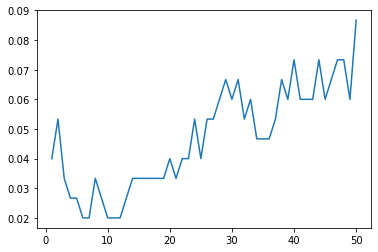

In [28]:
plt.plot(range(1, 51), error);

In [29]:
from sklearn.datasets import load_boston

In [30]:
boston_data = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [32]:
boston_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [33]:
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [35]:
X = boston_data.data
y = boston_data.target
knn = KNeighborsRegressor(n_neighbors= 10)
y_pred = cross_val_predict(knn, X, y, cv = 5)
# target continous olduğu için burada KNeighborsRegressor kullandık.

In [36]:
y_pred

array([24.  , 26.17, 21.95, 23.09, 21.99, 21.95, 23.72, 22.32, 23.54,
       27.12, 24.93, 22.62, 23.56, 22.63, 31.44, 23.75, 27.76, 27.38,
       25.43, 24.88, 27.33, 22.32, 22.32, 24.54, 22.32, 29.31, 31.44,
       29.31, 26.45, 31.44, 31.52, 28.19, 20.09, 34.18, 20.09, 21.17,
       23.19, 23.67, 24.47, 35.55, 33.77, 23.99, 23.99, 23.99, 21.66,
       21.65, 21.65, 30.28, 25.19, 21.95, 30.77, 31.98, 30.06, 30.06,
       31.11, 39.74, 25.23, 37.2 , 25.35, 25.61, 28.85, 36.17, 29.06,
       25.96, 28.66, 26.8 , 26.38, 27.11, 26.43, 26.43, 28.47, 28.32,
       30.27, 28.09, 25.67, 20.11, 28.54, 20.11, 20.11, 20.36, 26.85,
       32.41, 26.89, 26.01, 22.82, 25.55, 22.88, 22.79, 21.5 , 21.88,
       21.35, 21.68, 31.67, 31.17, 37.68, 25.85, 21.91, 21.81, 24.1 ,
       22.14, 19.22, 19.68, 13.62, 21.05, 21.05, 21.05, 21.05, 21.05,
       21.05, 21.05, 21.29, 20.52, 20.52, 20.52, 20.52, 19.2 , 19.34,
       20.52, 19.74, 19.6 , 28.03, 28.82, 23.98, 23.98, 25.38, 25.66,
       26.64, 20.52,

In [37]:
mean_squared_error(y, y_pred)

74.05401304347826

In [38]:
r2_score(y, y_pred)

0.12278604134701132

In [42]:
from math import sqrt
print(sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))

8.605464138759643
0.12278604134701132


In [43]:
error = []
for k in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv =5)
    error.append(mean_squared_error(y, y_pred))

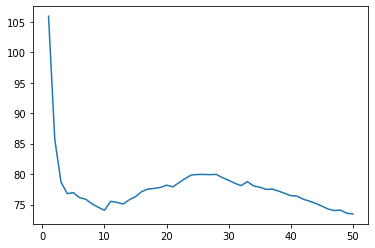

In [45]:
plt.plot(range(1, 51), error);

<h2>Scaling</h2>
<p>With numeric variables, scaling can help to reduce outliers.
    <p>A standard scaler, transforms variables into a value related to the min, max of the variable</p>
    <p>Scaling must be done on the training data, and then applied to the testing, so we need to add this to our classifier pipeline</p>

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [47]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = 10))

In [53]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv = 5)
print(sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))

5.492547106344652
0.6426411712043607


In [55]:
error = []
for k in range(1, 51):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = k))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv = 5)
    error.append(mean_squared_error(y, y_pred))

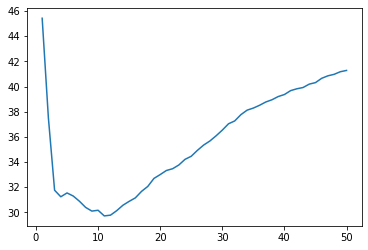

In [57]:
plt.plot(range(1, 51), error);

<h3>Comparing Models</h3>
<p>It's important when you compare models that you are comparing on the same data.
    <p>When the data is split into training and testing using cross-validation, you need to split the same way every time if you want to really compare trials</p>

In [58]:
from sklearn.model_selection import KFold

In [61]:
cv = KFold(n_splits=5, shuffle=False)

In [62]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv = cv)

print(mean_squared_error(y, y_pred))
print(r2_score(y, y_pred))

30.168073715415016
0.6426411712043607


<h3>Which is better? kNN or a simple linear regression model?</h3>
<p>Looking at the difference in RMSE and R2 we might assume that the knn performs significantly better than the Linear Model, however a two-sample t-test shows that they are not significantly different.

<h3>Feature Selection</h3>
<p>Sometimes not all input variables are good predictor of the output variables. Sometimes, some of them can actually decrease the accuracy of the model.</p>
<p>Feature Selection allows you to try out the model with different subsets of input variables to determine which are the best predictors</p>

<h3>Evaluation</h3>
<p>Looking at the mean squared error, and r2 score alone, often we can think we have a great model when in actual fact there are some underlying problems.
<p>That is why it is always imporant to look at the <b>residuals</b>
    <p><b>Coming soon: </b>Feature selection and Evaluation for kNN Regression (and most learning algorithms tbh)